In [1]:
from datetime import datetime
import time
import os
from tqdm import tqdm
import pandas as pd
import re
import matplotlib.pyplot as plt

import numpy as np
import nltk
from nltk.corpus import stopwords
import pyLDAvis.gensim_models
import jieba.posseg as jp,jieba
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora.dictionary import Dictionary
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import matplotlib
import jieba
from ark_nlp.factory.utils.conlleval import get_entity_bio

F:\ML_ENVS\lib\site-packages\scipy\sparse\sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [2]:
total_septext_list = []
total_bio_list = []
t = []
# with open('../datasets/sample_datasets/train_500.txt', encoding='UTF-8') as f:
with open('./train_9.txt', encoding='UTF-8') as f:
    line_lists = f.readlines()
    septext_list = []
    bio_list = []
    for line in tqdm(line_lists):

        l = line.split(' ')

        # 判断是否读完一条数据
        if len(l) == 1:
            total_septext_list.append(''.join(septext_list))
            total_bio_list.append(' '.join(bio_list))
            septext_list = []
            bio_list = []
        # 防止遇到这种情况：'  O'
        elif len(l) == 3:
            septext_list.append(' ')
            bio_list.append(l[2].rstrip('\n'))
        elif len(l) == 2:
            septext_list.append(l[0])
            bio_list.append(l[1].rstrip('\n'))
        else:
            print('异常数据')

100%|██████████| 2060407/2060407 [00:01<00:00, 1416965.02it/s]


In [3]:
len(total_septext_list),len(total_bio_list)


(36000, 36000)

In [4]:
df = pd.DataFrame({'text': total_septext_list,
                   'bio_label': total_bio_list})


In [5]:
text = df['text'].to_list()
label_list = df['bio_label'].apply(lambda x: x.split(' '))
len(text)
print(text[:5])
print(label_list[:5])

['先科（SAST）F1无线连接室外防水音柱壁挂式大功率定压公共广播喇叭校园播音系统户外防水音箱蓝牙无线防水音柱（一拖二十）', '水粉颜料白色大瓶300ml浅灰蓝柠檬黄美术生色彩颜料灌装hys 淡黄 单瓶(满2瓶送调色刀1把)', '全颂 智能手表腕带蓝牙防丢失学生跑步遥控拍照计步运动手环 智能手环黑色 智能手机通用款', '活页本笔记本子记事本A4小清新英语错题A5网格本B5活页纸外壳可拆卸线圈方格夹26孔扣环高中大学生用 B5横线(2本)+A5横线(1本)', 'L型透明亚克力桌牌亚克力展示架台卡支付码支付台签菜单奶茶店价目表产品介绍展示牌立牌酒水牌婚礼台卡定制 竖款大尺寸 127x187mm']
0    [B-1, I-1, O, B-1, I-1, I-1, I-1, O, B-3, I-3,...
1    [B-4, I-4, B-4, I-4, B-16, I-16, B-13, I-13, B...
2    [B-1, I-1, O, B-11, I-11, B-4, I-4, B-4, I-4, ...
3    [B-4, I-4, I-4, B-4, I-4, I-4, I-4, B-4, I-4, ...
4    [B-13, I-13, B-16, I-16, B-12, I-12, I-12, B-4...
Name: bio_label, dtype: object


In [6]:
# jieba分词
stopwords = [line.strip() for line in open('./hit_stopwords.txt',encoding='UTF-8').readlines()]
stopwords.append(' ')
for i in range(101):
    stopwords.append(i)
def jieba_separate_sentence(text):
    text = text.lower()
    sentence_depart = jieba.cut(text.strip())
    # 输出结果为outstr
    tokens = []
    # 去停用词
    for word in sentence_depart:
        if word not in stopwords:
            if word != '\t':
                tokens.append(word)
    return tokens



# 按实体分词
def entity_separate_sentence(text,labels):
    entity_labels = []
    for _type, _start_idx, _end_idx in get_entity_bio(labels, id2label=None):
                    entity_labels.append({
                        'start_idx': _start_idx,
                        'end_idx': _end_idx,
                        'type': _type,
                        'entity': text[_start_idx: _end_idx + 1]
                    })
    seq_list = []
    for info in entity_labels:
        seq_list.append(info['entity'])

    return seq_list



In [7]:
# text = [entity_separate_sentence(text=i,labels=j) for i,j in tqdm(zip(text, label_list))]
# print(len(text))
text = [jieba_separate_sentence(text=i) for i in tqdm(text)]
print(len(text))

  0%|          | 0/36000 [00:00<?, ?it/s]Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\MACHEN~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.542 seconds.
Prefix dict has been built successfully.
100%|██████████| 36000/36000 [00:14<00:00, 2561.56it/s]


36000


In [8]:
# x = text[0]
# x

In [9]:
# entity_separate_sentence(x, label_list[0])

In [10]:
# jieba_separate_sentence(x)

In [8]:
# text

[['先科',
  'sast',
  'f1',
  '无线连接',
  '室外',
  '防水',
  '音柱',
  '壁挂式',
  '大功率',
  '定压',
  '公共广播',
  '喇叭',
  '校园',
  '播音',
  '系统',
  '户外',
  '防水',
  '音箱',
  '蓝牙',
  '无线',
  '防水',
  '音柱',
  '一拖',
  '二十'],
 ['水粉',
  '颜料',
  '白色',
  '大瓶',
  '300ml',
  '浅灰',
  '蓝',
  '柠檬黄',
  '美术',
  '生',
  '色彩',
  '颜料',
  '灌装',
  'hys',
  '淡黄',
  '单瓶',
  '满',
  '2',
  '瓶',
  '送',
  '调色刀',
  '1'],
 ['全颂',
  '智能',
  '手表',
  '腕带',
  '蓝牙',
  '防',
  '丢失',
  '学生',
  '跑步',
  '遥控',
  '拍照',
  '计步',
  '运动',
  '手环',
  '智能',
  '手环',
  '黑色',
  '智能手机',
  '通用',
  '款'],
 ['活页',
  '笔记本',
  '子',
  '记事本',
  'a4',
  '小',
  '清新',
  '英语',
  '错题',
  'a5',
  '网格',
  'b5',
  '活页纸',
  '外壳',
  '可拆卸',
  '线圈',
  '方格',
  '夹',
  '26',
  '孔',
  '扣环',
  '高中',
  '大学生',
  'b5',
  '横线',
  '2',
  'a5',
  '横线',
  '1'],
 ['l',
  '型',
  '透明',
  '亚克力',
  '桌牌',
  '亚克力',
  '展示架',
  '台卡',
  '支付',
  '码',
  '支付',
  '台签',
  '菜单',
  '奶茶',
  '店',
  '价目表',
  '产品',
  '介绍',
  '展示',
  '牌立牌',
  '酒水',
  '牌',
  '婚礼',
  '台卡',
  '定制',
  '竖款',
  '大',
  '尺寸',
  '127x

In [9]:
# 构造词典
dictionary = Dictionary(text)
# 基于词典，使【词】→【稀疏向量】，并将向量放入列表，形成【稀疏向量集】
corpus = [dictionary.doc2bow(words) for words in text]
#计算困惑度
def perplexity(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=15))
    print(ldamodel.log_perplexity(corpus))
    return ldamodel.log_perplexity(corpus)
#计算coherence
def coherence(num_topics):
    ldamodel = LdaModel(corpus, num_topics=num_topics, id2word = dictionary, passes=30,random_state = 1)
    print(ldamodel.print_topics(num_topics=num_topics, num_words=10))
    ldacm = CoherenceModel(model=ldamodel, texts=text, dictionary=dictionary, coherence='c_v')
    print(ldacm.get_coherence())
    return ldacm.get_coherence()



In [10]:
x = range(1,21)
# z = [perplexity(i) for i in x]  #如果想用困惑度就选这个
y = [coherence(i) for i in tqdm(x)]

 15%|█▌        | 3/20 [05:54<36:22, 128.36s/it]

[(0, '0.009*"手机" + 0.006*"膜" + 0.006*"家用" + 0.005*"壳" + 0.005*"套装" + 0.004*"英寸" + 0.004*"学生" + 0.004*"办公" + 0.004*"笔记本" + 0.004*"电脑"')]
0.21093320036616997
[(0, '0.018*"手机" + 0.013*"膜" + 0.011*"壳" + 0.009*"英寸" + 0.008*"电脑" + 0.008*"保护套" + 0.007*"键盘" + 0.007*"外壳" + 0.007*"华为" + 0.006*"苹果"'), (1, '0.009*"家用" + 0.008*"学生" + 0.006*"套装" + 0.006*"办公" + 0.005*"a4" + 0.005*"笔" + 0.005*"儿童" + 0.005*"小" + 0.004*"纸" + 0.004*"加厚"')]
0.46402588839862424
[(0, '0.015*"家用" + 0.013*"膜" + 0.013*"英寸" + 0.012*"键盘" + 0.011*"电脑" + 0.009*"笔记本" + 0.008*"贴膜" + 0.007*"外壳" + 0.007*"贴纸" + 0.007*"屏幕"'), (1, '0.011*"学生" + 0.008*"办公" + 0.007*"a4" + 0.007*"笔" + 0.007*"儿童" + 0.007*"套装" + 0.006*"纸" + 0.006*"文具" + 0.005*"色" + 0.005*"创意"'), (2, '0.026*"手机" + 0.015*"壳" + 0.011*"保护套" + 0.009*"支架" + 0.009*"华为" + 0.009*"无线" + 0.008*"苹果" + 0.008*"膜" + 0.008*"摔" + 0.006*"防"')]
0.5215739365545703


KeyboardInterrupt: 

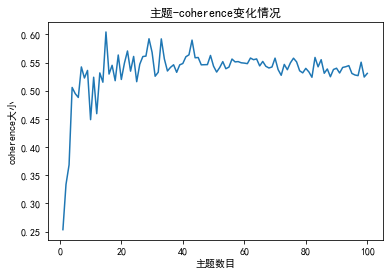

In [11]:
plt.plot(x, y)
plt.xlabel('主题数目')
plt.ylabel('coherence大小')
plt.rcParams['font.sans-serif']=['SimHei']
matplotlib.rcParams['axes.unicode_minus']=False
plt.title('主题-coherence变化情况')
plt.show()


In [12]:
# 构造词典
dictionary = Dictionary(text)
# 基于词典，使【词】→【稀疏向量】，并将向量放入列表，形成【稀疏向量集】
corpus = [dictionary.doc2bow(words) for words in text]
# lda模型，num_topics设置主题的个数
lda = LdaModel(corpus=corpus, id2word=dictionary, num_topics=20, random_state=1998, iterations=50)
# U_Mass Coherence
ldaCM = CoherenceModel(model=lda, corpus=corpus, dictionary=dictionary, coherence='u_mass')

# 打印所有主题，每个主题显示10个词
for topic in lda.print_topics(num_words=10):
    print(topic)


(0, '0.068*"家用" + 0.024*"机" + 0.023*"小型" + 0.018*"多功能" + 0.018*"迷你" + 0.015*"商用" + 0.015*"全自动" + 0.015*"智能" + 0.014*"电" + 0.012*"款"')
(1, '0.071*"手机" + 0.063*"壳" + 0.035*"保护套" + 0.033*"摔" + 0.027*"防" + 0.027*"苹果" + 0.024*"膜" + 0.023*"钢化" + 0.022*"硅胶" + 0.017*"支架"')
(2, '0.025*"牌" + 0.012*"套" + 0.011*"网线" + 0.011*"亚克力" + 0.011*"a4" + 0.011*"卡套" + 0.010*"型" + 0.010*"双面" + 0.010*"广告" + 0.010*"展示"')
(3, '0.038*"外壳" + 0.036*"贴纸" + 0.035*"膜" + 0.030*"贴膜" + 0.029*"英寸" + 0.029*"面" + 0.026*"笔记本" + 0.024*"机身" + 0.023*"电脑" + 0.022*"保护"')
(4, '0.040*"笔" + 0.025*"学生" + 0.023*"支" + 0.018*"小学生" + 0.016*"黑色" + 0.015*"0.5" + 0.015*"文具" + 0.014*"素描" + 0.014*"中性笔" + 0.014*"铅笔"')
(5, '0.018*"财务" + 0.017*"单" + 0.014*"器" + 0.012*"印章" + 0.012*"收据" + 0.011*"手柄" + 0.010*"10" + 0.010*"凭证" + 0.009*"索尼" + 0.009*"仪"')
(6, '0.037*"垫" + 0.035*"鼠标垫" + 0.025*"定制" + 0.025*"超大" + 0.024*"游戏" + 0.015*"办公桌" + 0.015*"加厚" + 0.014*"号" + 0.013*"键盘" + 0.013*"办公"')
(7, '0.026*"笔记本" + 0.023*"创意" + 0.022*"小" + 0.020*"a5" + 0.020*"

In [13]:
# 用pyLDAvis将LDA模式可视化
plot =pyLDAvis.gensim_models.prepare(lda,corpus,dictionary,sort_topics=False)
# 保存到本地html
pyLDAvis.save_html(plot, './lda.html')


<Figure size 432x288 with 0 Axes>

In [14]:
sum=0
sent_topics_df = pd.DataFrame()
for i, row in enumerate(lda[corpus]):
    row = sorted(row, key=lambda x: (x[1]), reverse=True)
    for j, (topic_num, prop_topic) in enumerate(row):
        if j == 0:  # 因为拍过序了只输出最优的一个主题即类别即可
            sum+=1
            wp = lda.show_topic(topic_num)
            topic_keywords = ", ".join([word for word, prop in wp])
            sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
        else:
            break
sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
# Add original text to the end of the output
contents = df['text'] # 原文本
label = df['bio_label']# 原标签
sent_topics_df = pd.concat([contents, label, sent_topics_df], axis=1)


In [42]:

row

[(2, 0.8062916), (0, 0.16407533)]

In [15]:
sent_topics_df.to_excel('./train_9.xlsx', index=False)

,text,Dominant_Topic,Perc_Contribution,Topic_Keywords
0,先科（SAST）F1无线连接室外防水音柱壁挂式大功率定压公共广播喇叭校园播音系统户外防水音箱...,4.0,0.3183,", -, （, ）, 家用, 喇叭, +, 人, 箱, 锅"
1,水粉颜料白色大瓶300ml浅灰蓝柠檬黄美术生色彩颜料灌装hys 淡黄 单瓶(满2瓶送调色刀1把),0.0,0.3950,", +, 带, 摄影, 三角, 镜头, 手机, -, 可擦, 【"
2,全颂 智能手表腕带蓝牙防丢失学生跑步遥控拍照计步运动手环 智能手环黑色 智能手机通用款,12.0,0.6361,", 壳, 手机, /, +, 保护套, 摔, -, 华为, 硅胶"
3,活页本笔记本子记事本A4小清新英语错题A5网格本B5活页纸外壳可拆卸线圈方格夹26孔扣环高中...,16.0,0.8091,", 本, 创意, 笔记本, 文具, 小, a5, 简约, /, a4"
4,L型透明亚克力桌牌亚克力展示架台卡支付码支付台签菜单奶茶店价目表产品介绍展示牌立牌酒水牌婚礼...,1.0,0.4018,", 监控, 摄像头, 牌, 套装, 高清, -, 财务, 印章, 网络"
...,...,...,...,...
35995,亚克力台卡架强磁展示牌a4台签定制a5透明t型水晶餐桌水牌酒水菜单立牌产品广告摆台牌双面座位...,1.0,0.8589,", 监控, 摄像头, 牌, 套装, 高清, -, 财务, 印章, 网络"
35996,欣迪斯 三星j4 plus手机壳 j4plus保护套 j4plus硅胶套透明超薄款 透明壳+...,12.0,0.7530,", 壳, 手机, /, +, 保护套, 摔, -, 华为, 硅胶"
35997,【春节不打烊】美的暖风机小型取暖器家用办公室烤火脚炉节省能电暖器新款,17.0,0.9325,", 家用, （, ）, -, 米, 机, 智能, +, 小型"
35998,办公事务用胶水 双头粗细浆糊 便携液体胶水笔,3.0,0.3175,", 膜, 钢化, /, -, 【, 】, 送, 小米, +"
